# Sentiment analysis with Twitter data

In [7]:
import json
import pandas as pd
# uncomment the below to use your own token
#from config import tweeter_token
import nltk
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jacob\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Jacob\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Using Data from Twitter

In [8]:
with open('football_tweets.json') as file:
    loaded = json.load(file)

In [9]:
print(loaded)

{'data': [{'id': '1636644345548791809', 'created_at': '2023-03-17T08:23:14.000Z', 'edit_history_tweet_ids': ['1636644345548791809'], 'text': "We can't let a team that can't get through the round of 16 in the Europa League, win the Premier League. That shits just embarrassing man"}, {'id': '1636644337520967682', 'created_at': '2023-03-17T08:23:12.000Z', 'edit_history_tweet_ids': ['1636644337520967682'], 'text': 'Premier League outgoings this season...🔟\n\nScott Parker: Bournemouth\nThomas Tuchel: Chelsea\nGraham Potter: Brighton\nBruno Lage: Wolves\nSteven Gerrard: Aston Villa\nRalph Hasenhuttl: Saints\nFrank Lampard: Everton\nJesse Marsch: Leeds\nNathan Jones: Saints\nPatrick Vieira: Palace'}, {'id': '1636644336136847361', 'created_at': '2023-03-17T08:23:11.000Z', 'edit_history_tweet_ids': ['1636644336136847361'], 'text': '📣Crystal Palace have sacked Patrick Vieira, with the club sitting 12th in the Premier League https://t.co/p0L6ghwCT6'}, {'id': '1636644316046143489', 'created_at': '

Load data to a pandas data frame

In [10]:
# You may need to install fsspec
df = pd.DataFrame.from_dict(loaded["data"])

In [11]:
df

,id,created_at,edit_history_tweet_ids,text
0,1636644345548791809,2023-03-17T08:23:14.000Z,[1636644345548791809],We can't let a team that can't get through the...
1,1636644337520967682,2023-03-17T08:23:12.000Z,[1636644337520967682],Premier League outgoings this season...🔟\n\nSc...
2,1636644336136847361,2023-03-17T08:23:11.000Z,[1636644336136847361],"📣Crystal Palace have sacked Patrick Vieira, wi..."
3,1636644316046143489,2023-03-17T08:23:06.000Z,[1636644316046143489],FPL tips and advice: Leave enough money in ban...
4,1636644302603399175,2023-03-17T08:23:03.000Z,[1636644302603399175],It’s time to remove Arsenal to win crystal pa...
...,...,...,...,...
1094,1636532262886858752,2023-03-17T00:57:51.000Z,[1636532262886858752],"Win the premier league, Arsenal. Don’t bottle it"
1095,1636532069827321858,2023-03-17T00:57:05.000Z,[1636532069827321858],Tbh Arteta has to question and challenge sone ...
1096,1636531869662445568,2023-03-17T00:56:17.000Z,[1636531869662445568],Latest! Arsenal aren't built for squad rotatio...
1097,1636531813752483840,2023-03-17T00:56:04.000Z,[1636531813752483840],Premier League crisis club of the week: Leices...


# Cleaning Tweets for better analysis

## Removing Emojis

In [12]:
# https://stackoverflow.com/questions/33404752/removing-emojis-from-a-string-in-python
import re
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [13]:
df['text'] = df['text'].apply(remove_emojis)

In [14]:
df

,id,created_at,edit_history_tweet_ids,text
0,1636644345548791809,2023-03-17T08:23:14.000Z,[1636644345548791809],We can't let a team that can't get through the...
1,1636644337520967682,2023-03-17T08:23:12.000Z,[1636644337520967682],Premier League outgoings this season...\n\nSco...
2,1636644336136847361,2023-03-17T08:23:11.000Z,[1636644336136847361],"Crystal Palace have sacked Patrick Vieira, wit..."
3,1636644316046143489,2023-03-17T08:23:06.000Z,[1636644316046143489],FPL tips and advice: Leave enough money in ban...
4,1636644302603399175,2023-03-17T08:23:03.000Z,[1636644302603399175],It’s time to remove Arsenal to win crystal pa...
...,...,...,...,...
1094,1636532262886858752,2023-03-17T00:57:51.000Z,[1636532262886858752],"Win the premier league, Arsenal. Don’t bottle it"
1095,1636532069827321858,2023-03-17T00:57:05.000Z,[1636532069827321858],Tbh Arteta has to question and challenge sone ...
1096,1636531869662445568,2023-03-17T00:56:17.000Z,[1636531869662445568],Latest! Arsenal aren't built for squad rotatio...
1097,1636531813752483840,2023-03-17T00:56:04.000Z,[1636531813752483840],Premier League crisis club of the week: Leices...


## Tokenizering data

In [15]:
df['tokens'] = df['text'].apply(TweetTokenizer().tokenize)

In [16]:
df

,id,created_at,edit_history_tweet_ids,text,tokens
0,1636644345548791809,2023-03-17T08:23:14.000Z,[1636644345548791809],We can't let a team that can't get through the...,"[We, can't, let, a, team, that, can't, get, th..."
1,1636644337520967682,2023-03-17T08:23:12.000Z,[1636644337520967682],Premier League outgoings this season...\n\nSco...,"[Premier, League, outgoings, this, season, ......"
2,1636644336136847361,2023-03-17T08:23:11.000Z,[1636644336136847361],"Crystal Palace have sacked Patrick Vieira, wit...","[Crystal, Palace, have, sacked, Patrick, Vieir..."
3,1636644316046143489,2023-03-17T08:23:06.000Z,[1636644316046143489],FPL tips and advice: Leave enough money in ban...,"[FPL, tips, and, advice, :, Leave, enough, mon..."
4,1636644302603399175,2023-03-17T08:23:03.000Z,[1636644302603399175],It’s time to remove Arsenal to win crystal pa...,"[It, ’, s, time, to, remove, Arsenal, to, win,..."
...,...,...,...,...,...
1094,1636532262886858752,2023-03-17T00:57:51.000Z,[1636532262886858752],"Win the premier league, Arsenal. Don’t bottle it","[Win, the, premier, league, ,, Arsenal, ., Don..."
1095,1636532069827321858,2023-03-17T00:57:05.000Z,[1636532069827321858],Tbh Arteta has to question and challenge sone ...,"[Tbh, Arteta, has, to, question, and, challeng..."
1096,1636531869662445568,2023-03-17T00:56:17.000Z,[1636531869662445568],Latest! Arsenal aren't built for squad rotatio...,"[Latest, !, Arsenal, aren't, built, for, squad..."
1097,1636531813752483840,2023-03-17T00:56:04.000Z,[1636531813752483840],Premier League crisis club of the week: Leices...,"[Premier, League, crisis, club, of, the, week,..."


## Removing Stop words

In [17]:
# Python Specific Stuff happening here: Lambda Functions + List Comprehension

stopwords_vocabulary = stopwords.words('english')

df['stopwords'] = df['tokens'].apply(lambda x: [i for i in x if i.lower() not in stopwords_vocabulary])

In [18]:
df

,id,created_at,edit_history_tweet_ids,text,tokens,stopwords
0,1636644345548791809,2023-03-17T08:23:14.000Z,[1636644345548791809],We can't let a team that can't get through the...,"[We, can't, let, a, team, that, can't, get, th...","[can't, let, team, can't, get, round, 16, Euro..."
1,1636644337520967682,2023-03-17T08:23:12.000Z,[1636644337520967682],Premier League outgoings this season...\n\nSco...,"[Premier, League, outgoings, this, season, ......","[Premier, League, outgoings, season, ..., Scot..."
2,1636644336136847361,2023-03-17T08:23:11.000Z,[1636644336136847361],"Crystal Palace have sacked Patrick Vieira, wit...","[Crystal, Palace, have, sacked, Patrick, Vieir...","[Crystal, Palace, sacked, Patrick, Vieira, ,, ..."
3,1636644316046143489,2023-03-17T08:23:06.000Z,[1636644316046143489],FPL tips and advice: Leave enough money in ban...,"[FPL, tips, and, advice, :, Leave, enough, mon...","[FPL, tips, advice, :, Leave, enough, money, b..."
4,1636644302603399175,2023-03-17T08:23:03.000Z,[1636644302603399175],It’s time to remove Arsenal to win crystal pa...,"[It, ’, s, time, to, remove, Arsenal, to, win,...","[’, time, remove, Arsenal, win, crystal, palac..."
...,...,...,...,...,...,...
1094,1636532262886858752,2023-03-17T00:57:51.000Z,[1636532262886858752],"Win the premier league, Arsenal. Don’t bottle it","[Win, the, premier, league, ,, Arsenal, ., Don...","[Win, premier, league, ,, Arsenal, ., ’, bottle]"
1095,1636532069827321858,2023-03-17T00:57:05.000Z,[1636532069827321858],Tbh Arteta has to question and challenge sone ...,"[Tbh, Arteta, has, to, question, and, challeng...","[Tbh, Arteta, question, challenge, sone, playe..."
1096,1636531869662445568,2023-03-17T00:56:17.000Z,[1636531869662445568],Latest! Arsenal aren't built for squad rotatio...,"[Latest, !, Arsenal, aren't, built, for, squad...","[Latest, !, Arsenal, built, squad, rotation, ,..."
1097,1636531813752483840,2023-03-17T00:56:04.000Z,[1636531813752483840],Premier League crisis club of the week: Leices...,"[Premier, League, crisis, club, of, the, week,...","[Premier, League, crisis, club, week, :, Leice..."


## Removing punctuation

In [19]:
punctuations = list(string.punctuation)
print(punctuations)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [20]:
# Remove Punctuation
df['punctuation'] = df['stopwords'].apply(lambda x: [i for i in x if i not in punctuations])

In [21]:
df

,id,created_at,edit_history_tweet_ids,text,tokens,stopwords,punctuation
0,1636644345548791809,2023-03-17T08:23:14.000Z,[1636644345548791809],We can't let a team that can't get through the...,"[We, can't, let, a, team, that, can't, get, th...","[can't, let, team, can't, get, round, 16, Euro...","[can't, let, team, can't, get, round, 16, Euro..."
1,1636644337520967682,2023-03-17T08:23:12.000Z,[1636644337520967682],Premier League outgoings this season...\n\nSco...,"[Premier, League, outgoings, this, season, ......","[Premier, League, outgoings, season, ..., Scot...","[Premier, League, outgoings, season, ..., Scot..."
2,1636644336136847361,2023-03-17T08:23:11.000Z,[1636644336136847361],"Crystal Palace have sacked Patrick Vieira, wit...","[Crystal, Palace, have, sacked, Patrick, Vieir...","[Crystal, Palace, sacked, Patrick, Vieira, ,, ...","[Crystal, Palace, sacked, Patrick, Vieira, clu..."
3,1636644316046143489,2023-03-17T08:23:06.000Z,[1636644316046143489],FPL tips and advice: Leave enough money in ban...,"[FPL, tips, and, advice, :, Leave, enough, mon...","[FPL, tips, advice, :, Leave, enough, money, b...","[FPL, tips, advice, Leave, enough, money, bank..."
4,1636644302603399175,2023-03-17T08:23:03.000Z,[1636644302603399175],It’s time to remove Arsenal to win crystal pa...,"[It, ’, s, time, to, remove, Arsenal, to, win,...","[’, time, remove, Arsenal, win, crystal, palac...","[’, time, remove, Arsenal, win, crystal, palac..."
...,...,...,...,...,...,...,...
1094,1636532262886858752,2023-03-17T00:57:51.000Z,[1636532262886858752],"Win the premier league, Arsenal. Don’t bottle it","[Win, the, premier, league, ,, Arsenal, ., Don...","[Win, premier, league, ,, Arsenal, ., ’, bottle]","[Win, premier, league, Arsenal, ’, bottle]"
1095,1636532069827321858,2023-03-17T00:57:05.000Z,[1636532069827321858],Tbh Arteta has to question and challenge sone ...,"[Tbh, Arteta, has, to, question, and, challeng...","[Tbh, Arteta, question, challenge, sone, playe...","[Tbh, Arteta, question, challenge, sone, playe..."
1096,1636531869662445568,2023-03-17T00:56:17.000Z,[1636531869662445568],Latest! Arsenal aren't built for squad rotatio...,"[Latest, !, Arsenal, aren't, built, for, squad...","[Latest, !, Arsenal, built, squad, rotation, ,...","[Latest, Arsenal, built, squad, rotation, Euro..."
1097,1636531813752483840,2023-03-17T00:56:04.000Z,[1636531813752483840],Premier League crisis club of the week: Leices...,"[Premier, League, crisis, club, of, the, week,...","[Premier, League, crisis, club, week, :, Leice...","[Premier, League, crisis, club, week, Leiceste..."


## Removing Numbers

In [22]:
# Remove Digits
df['digits'] = df['punctuation'].apply(lambda x: [i for i in x if i[0] not in list(string.digits)])

In [23]:
df

,id,created_at,edit_history_tweet_ids,text,tokens,stopwords,punctuation,digits
0,1636644345548791809,2023-03-17T08:23:14.000Z,[1636644345548791809],We can't let a team that can't get through the...,"[We, can't, let, a, team, that, can't, get, th...","[can't, let, team, can't, get, round, 16, Euro...","[can't, let, team, can't, get, round, 16, Euro...","[can't, let, team, can't, get, round, Europa, ..."
1,1636644337520967682,2023-03-17T08:23:12.000Z,[1636644337520967682],Premier League outgoings this season...\n\nSco...,"[Premier, League, outgoings, this, season, ......","[Premier, League, outgoings, season, ..., Scot...","[Premier, League, outgoings, season, ..., Scot...","[Premier, League, outgoings, season, ..., Scot..."
2,1636644336136847361,2023-03-17T08:23:11.000Z,[1636644336136847361],"Crystal Palace have sacked Patrick Vieira, wit...","[Crystal, Palace, have, sacked, Patrick, Vieir...","[Crystal, Palace, sacked, Patrick, Vieira, ,, ...","[Crystal, Palace, sacked, Patrick, Vieira, clu...","[Crystal, Palace, sacked, Patrick, Vieira, clu..."
3,1636644316046143489,2023-03-17T08:23:06.000Z,[1636644316046143489],FPL tips and advice: Leave enough money in ban...,"[FPL, tips, and, advice, :, Leave, enough, mon...","[FPL, tips, advice, :, Leave, enough, money, b...","[FPL, tips, advice, Leave, enough, money, bank...","[FPL, tips, advice, Leave, enough, money, bank..."
4,1636644302603399175,2023-03-17T08:23:03.000Z,[1636644302603399175],It’s time to remove Arsenal to win crystal pa...,"[It, ’, s, time, to, remove, Arsenal, to, win,...","[’, time, remove, Arsenal, win, crystal, palac...","[’, time, remove, Arsenal, win, crystal, palac...","[’, time, remove, Arsenal, win, crystal, palac..."
...,...,...,...,...,...,...,...,...
1094,1636532262886858752,2023-03-17T00:57:51.000Z,[1636532262886858752],"Win the premier league, Arsenal. Don’t bottle it","[Win, the, premier, league, ,, Arsenal, ., Don...","[Win, premier, league, ,, Arsenal, ., ’, bottle]","[Win, premier, league, Arsenal, ’, bottle]","[Win, premier, league, Arsenal, ’, bottle]"
1095,1636532069827321858,2023-03-17T00:57:05.000Z,[1636532069827321858],Tbh Arteta has to question and challenge sone ...,"[Tbh, Arteta, has, to, question, and, challeng...","[Tbh, Arteta, question, challenge, sone, playe...","[Tbh, Arteta, question, challenge, sone, playe...","[Tbh, Arteta, question, challenge, sone, playe..."
1096,1636531869662445568,2023-03-17T00:56:17.000Z,[1636531869662445568],Latest! Arsenal aren't built for squad rotatio...,"[Latest, !, Arsenal, aren't, built, for, squad...","[Latest, !, Arsenal, built, squad, rotation, ,...","[Latest, Arsenal, built, squad, rotation, Euro...","[Latest, Arsenal, built, squad, rotation, Euro..."
1097,1636531813752483840,2023-03-17T00:56:04.000Z,[1636531813752483840],Premier League crisis club of the week: Leices...,"[Premier, League, crisis, club, of, the, week,...","[Premier, League, crisis, club, week, :, Leice...","[Premier, League, crisis, club, week, Leiceste...","[Premier, League, crisis, club, week, Leiceste..."


In [24]:
df['final'] = df['digits'].apply(lambda x: [i for i in x if len(i) > 1])

In [25]:
df

,id,created_at,edit_history_tweet_ids,text,tokens,stopwords,punctuation,digits,final
0,1636644345548791809,2023-03-17T08:23:14.000Z,[1636644345548791809],We can't let a team that can't get through the...,"[We, can't, let, a, team, that, can't, get, th...","[can't, let, team, can't, get, round, 16, Euro...","[can't, let, team, can't, get, round, 16, Euro...","[can't, let, team, can't, get, round, Europa, ...","[can't, let, team, can't, get, round, Europa, ..."
1,1636644337520967682,2023-03-17T08:23:12.000Z,[1636644337520967682],Premier League outgoings this season...\n\nSco...,"[Premier, League, outgoings, this, season, ......","[Premier, League, outgoings, season, ..., Scot...","[Premier, League, outgoings, season, ..., Scot...","[Premier, League, outgoings, season, ..., Scot...","[Premier, League, outgoings, season, ..., Scot..."
2,1636644336136847361,2023-03-17T08:23:11.000Z,[1636644336136847361],"Crystal Palace have sacked Patrick Vieira, wit...","[Crystal, Palace, have, sacked, Patrick, Vieir...","[Crystal, Palace, sacked, Patrick, Vieira, ,, ...","[Crystal, Palace, sacked, Patrick, Vieira, clu...","[Crystal, Palace, sacked, Patrick, Vieira, clu...","[Crystal, Palace, sacked, Patrick, Vieira, clu..."
3,1636644316046143489,2023-03-17T08:23:06.000Z,[1636644316046143489],FPL tips and advice: Leave enough money in ban...,"[FPL, tips, and, advice, :, Leave, enough, mon...","[FPL, tips, advice, :, Leave, enough, money, b...","[FPL, tips, advice, Leave, enough, money, bank...","[FPL, tips, advice, Leave, enough, money, bank...","[FPL, tips, advice, Leave, enough, money, bank..."
4,1636644302603399175,2023-03-17T08:23:03.000Z,[1636644302603399175],It’s time to remove Arsenal to win crystal pa...,"[It, ’, s, time, to, remove, Arsenal, to, win,...","[’, time, remove, Arsenal, win, crystal, palac...","[’, time, remove, Arsenal, win, crystal, palac...","[’, time, remove, Arsenal, win, crystal, palac...","[time, remove, Arsenal, win, crystal, palace, ..."
...,...,...,...,...,...,...,...,...,...
1094,1636532262886858752,2023-03-17T00:57:51.000Z,[1636532262886858752],"Win the premier league, Arsenal. Don’t bottle it","[Win, the, premier, league, ,, Arsenal, ., Don...","[Win, premier, league, ,, Arsenal, ., ’, bottle]","[Win, premier, league, Arsenal, ’, bottle]","[Win, premier, league, Arsenal, ’, bottle]","[Win, premier, league, Arsenal, bottle]"
1095,1636532069827321858,2023-03-17T00:57:05.000Z,[1636532069827321858],Tbh Arteta has to question and challenge sone ...,"[Tbh, Arteta, has, to, question, and, challeng...","[Tbh, Arteta, question, challenge, sone, playe...","[Tbh, Arteta, question, challenge, sone, playe...","[Tbh, Arteta, question, challenge, sone, playe...","[Tbh, Arteta, question, challenge, sone, playe..."
1096,1636531869662445568,2023-03-17T00:56:17.000Z,[1636531869662445568],Latest! Arsenal aren't built for squad rotatio...,"[Latest, !, Arsenal, aren't, built, for, squad...","[Latest, !, Arsenal, built, squad, rotation, ,...","[Latest, Arsenal, built, squad, rotation, Euro...","[Latest, Arsenal, built, squad, rotation, Euro...","[Latest, Arsenal, built, squad, rotation, Euro..."
1097,1636531813752483840,2023-03-17T00:56:04.000Z,[1636531813752483840],Premier League crisis club of the week: Leices...,"[Premier, League, crisis, club, of, the, week,...","[Premier, League, crisis, club, week, :, Leice...","[Premier, League, crisis, club, week, Leiceste...","[Premier, League, crisis, club, week, Leiceste...","[Premier, League, crisis, club, week, Leiceste..."


###  <span style="color:red"> Exercise 1 </span>
- Create a python script that would run and do the cleaning steps on a text i.e convert the above cleaning steps into python functions that can be called a given text

# Sentiment Analysis

In [26]:
sentiment = SentimentIntensityAnalyzer()

sentiment.polarity_scores("I am not happy")

{'neg': 0.6, 'neu': 0.4, 'pos': 0.0, 'compound': -0.4585}

In [27]:
arr = ['hi', 'there', 'world']

print(' '.join(arr))

hi there world


In [28]:
df['sentiment'] = df['final'].apply(lambda x: sentiment.polarity_scores(' '.join(x))['compound'])

In [29]:
df

,id,created_at,edit_history_tweet_ids,text,tokens,stopwords,punctuation,digits,final,sentiment
0,1636644345548791809,2023-03-17T08:23:14.000Z,[1636644345548791809],We can't let a team that can't get through the...,"[We, can't, let, a, team, that, can't, get, th...","[can't, let, team, can't, get, round, 16, Euro...","[can't, let, team, can't, get, round, 16, Euro...","[can't, let, team, can't, get, round, Europa, ...","[can't, let, team, can't, get, round, Europa, ...",-0.2263
1,1636644337520967682,2023-03-17T08:23:12.000Z,[1636644337520967682],Premier League outgoings this season...\n\nSco...,"[Premier, League, outgoings, this, season, ......","[Premier, League, outgoings, season, ..., Scot...","[Premier, League, outgoings, season, ..., Scot...","[Premier, League, outgoings, season, ..., Scot...","[Premier, League, outgoings, season, ..., Scot...",0.0000
2,1636644336136847361,2023-03-17T08:23:11.000Z,[1636644336136847361],"Crystal Palace have sacked Patrick Vieira, wit...","[Crystal, Palace, have, sacked, Patrick, Vieir...","[Crystal, Palace, sacked, Patrick, Vieira, ,, ...","[Crystal, Palace, sacked, Patrick, Vieira, clu...","[Crystal, Palace, sacked, Patrick, Vieira, clu...","[Crystal, Palace, sacked, Patrick, Vieira, clu...",0.0000
3,1636644316046143489,2023-03-17T08:23:06.000Z,[1636644316046143489],FPL tips and advice: Leave enough money in ban...,"[FPL, tips, and, advice, :, Leave, enough, mon...","[FPL, tips, advice, :, Leave, enough, money, b...","[FPL, tips, advice, Leave, enough, money, bank...","[FPL, tips, advice, Leave, enough, money, bank...","[FPL, tips, advice, Leave, enough, money, bank...",0.6124
4,1636644302603399175,2023-03-17T08:23:03.000Z,[1636644302603399175],It’s time to remove Arsenal to win crystal pa...,"[It, ’, s, time, to, remove, Arsenal, to, win,...","[’, time, remove, Arsenal, win, crystal, palac...","[’, time, remove, Arsenal, win, crystal, palac...","[’, time, remove, Arsenal, win, crystal, palac...","[time, remove, Arsenal, win, crystal, palace, ...",0.7845
...,...,...,...,...,...,...,...,...,...,...
1094,1636532262886858752,2023-03-17T00:57:51.000Z,[1636532262886858752],"Win the premier league, Arsenal. Don’t bottle it","[Win, the, premier, league, ,, Arsenal, ., Don...","[Win, premier, league, ,, Arsenal, ., ’, bottle]","[Win, premier, league, Arsenal, ’, bottle]","[Win, premier, league, Arsenal, ’, bottle]","[Win, premier, league, Arsenal, bottle]",0.5859
1095,1636532069827321858,2023-03-17T00:57:05.000Z,[1636532069827321858],Tbh Arteta has to question and challenge sone ...,"[Tbh, Arteta, has, to, question, and, challeng...","[Tbh, Arteta, question, challenge, sone, playe...","[Tbh, Arteta, question, challenge, sone, playe...","[Tbh, Arteta, question, challenge, sone, playe...","[Tbh, Arteta, question, challenge, sone, playe...",-0.1280
1096,1636531869662445568,2023-03-17T00:56:17.000Z,[1636531869662445568],Latest! Arsenal aren't built for squad rotatio...,"[Latest, !, Arsenal, aren't, built, for, squad...","[Latest, !, Arsenal, built, squad, rotation, ,...","[Latest, Arsenal, built, squad, rotation, Euro...","[Latest, Arsenal, built, squad, rotation, Euro...","[Latest, Arsenal, built, squad, rotation, Euro...",0.4939
1097,1636531813752483840,2023-03-17T00:56:04.000Z,[1636531813752483840],Premier League crisis club of the week: Leices...,"[Premier, League, crisis, club, of, the, week,...","[Premier, League, crisis, club, week, :, Leice...","[Premier, League, crisis, club, week, Leiceste...","[Premier, League, crisis, club, week, Leiceste...","[Premier, League, crisis, club, week, Leiceste...",-0.6249


In [30]:
pos = len(df[df.sentiment > 0])
neg = len(df[df.sentiment < 0])
neu = len(df[df.sentiment == 0])

print(pos, neg, neu)

605 181 313


In [31]:
import matplotlib.pyplot as plt

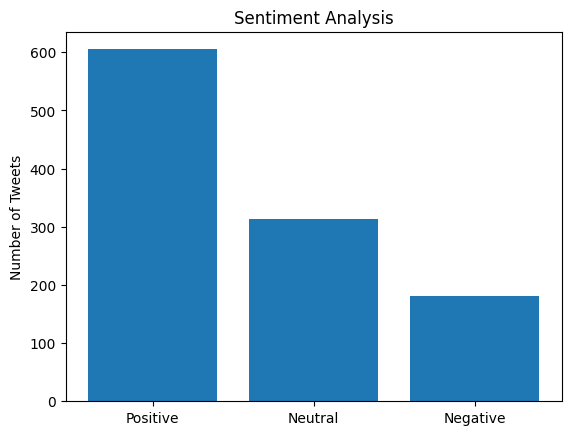

In [32]:
y = [pos, neu, neg]

plt.title('Sentiment Analysis')
plt.ylabel('Number of Tweets')
plt.bar(['Positive', 'Neutral', 'Negative'], y)
plt.show()

###  <span style="color:red"> Exercise 4 </span>
- Try using the matplotlib library to plot the data in another way

###  <span style="color:red"> Home work </span>
- Find an API of your choice, create an account and write a simple Python script to retrieve data.
- Try to use one of the ones we discussed in class or somthing new
- Once you have data clean up and visualise the data in a way of your choosing. 